In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [6]:
mydata = pd.read_csv('Titanic-Dataset.csv')

In [7]:
mydata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [67]:
mydf = mydata.copy()

In [68]:
mydf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [69]:
mydf.shape

(891, 12)

In [70]:
mydf.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [71]:
mydf.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [72]:
mydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [73]:
mydf.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [74]:
mydf.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [75]:
mydf.duplicated().sum()

0

In [76]:
categorical_cols = [feature for feature in mydf.columns if mydf[feature].dtype == 'O']
categorical_cols

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [77]:
numerical_cols = [feature for feature in mydf.columns if mydf[feature].dtype != 'O']
numerical_cols

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [78]:
mydf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [79]:
mydf.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace = True)

In [81]:
mydf.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [82]:
mydf[['Survived', 'Pclass', 'SibSp', 'Parch']] = mydf[['Survived', 'Pclass', 'SibSp', 'Parch']].astype('object')

In [83]:
mydf.dtypes

Survived     object
Pclass       object
Sex          object
Age         float64
SibSp        object
Parch        object
Fare        float64
Embarked     object
dtype: object

## UNIVARIATE ANALYSIS

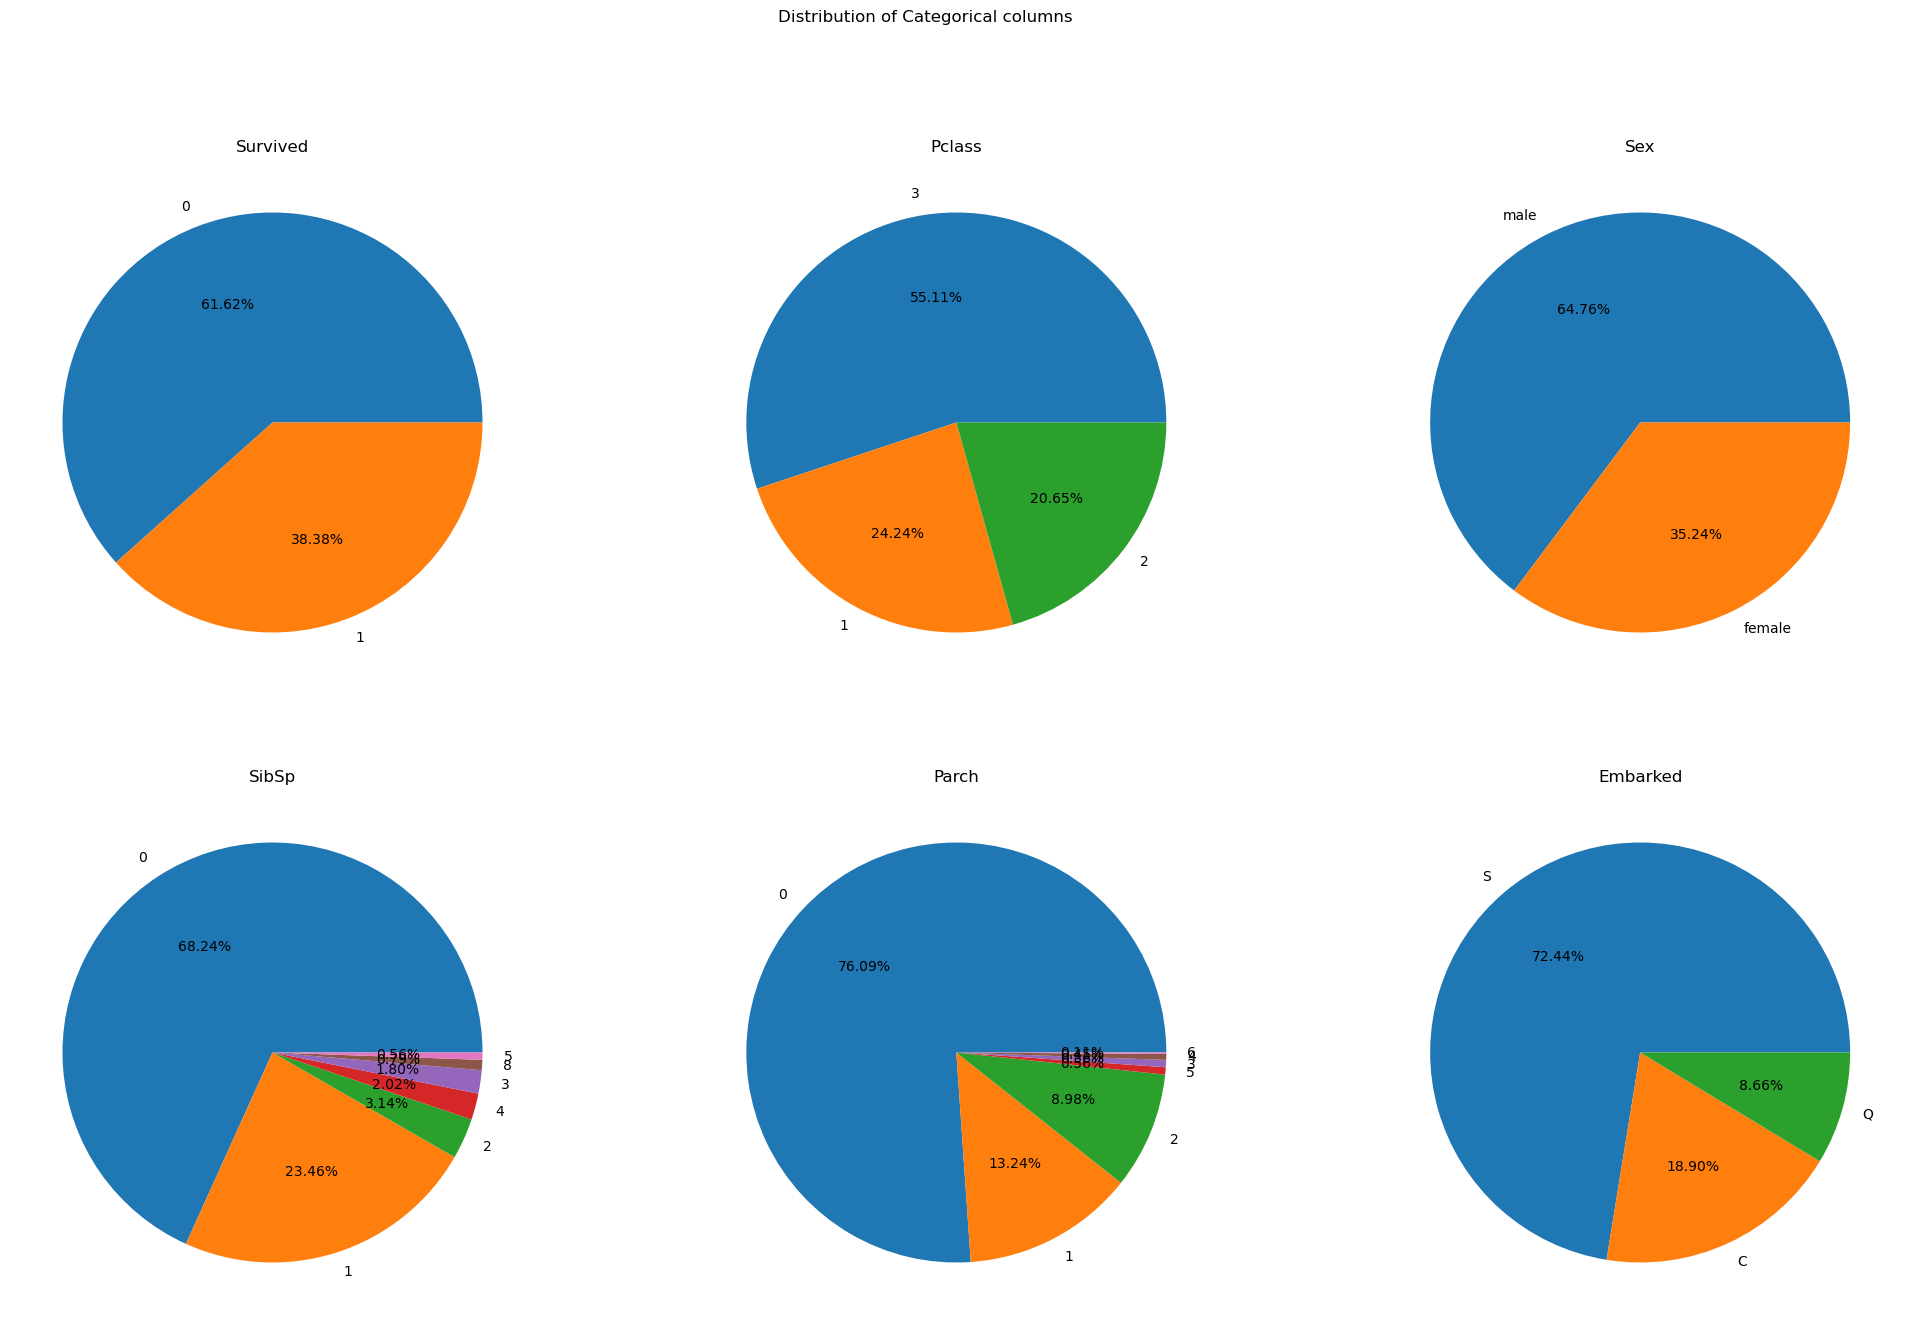

In [117]:
fig, ax = plt.subplots(2, 3, figsize = (25, 15))
plt.suptitle('Distribution of Categorical columns')
plt.subplot(231)
plt.title('Survived')
plt.pie(mydf.Survived.value_counts(), labels = ['0', '1'], autopct = '%.2f%%')

plt.subplot(232)
plt.title('Pclass')
plt.pie(mydf.Pclass.value_counts(), labels=['3','1','2'], autopct = '%.2f%%')

plt.subplot(233)
plt.title('Sex')
plt.pie(mydf.Sex.value_counts(), labels=['male', 'female'], autopct = '%.2f%%')

plt.subplot(234)
plt.title('SibSp')
plt.pie(mydf.SibSp.value_counts(), labels=['0', '1', '2', '4', '3', '8', '5'], autopct = '%.2f%%')


plt.subplot(235)
plt.title('Parch')
plt.pie(mydf.Parch.value_counts(), labels=['0', '1', '2', '5', '3', '4', '6'], autopct = '%.2f%%')

plt.subplot(236)
plt.title('Embarked')
plt.pie(mydf.Embarked.value_counts(), labels=['S', 'C', 'Q'], autopct = '%.2f%%')
plt.show()

In [116]:
mydf.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

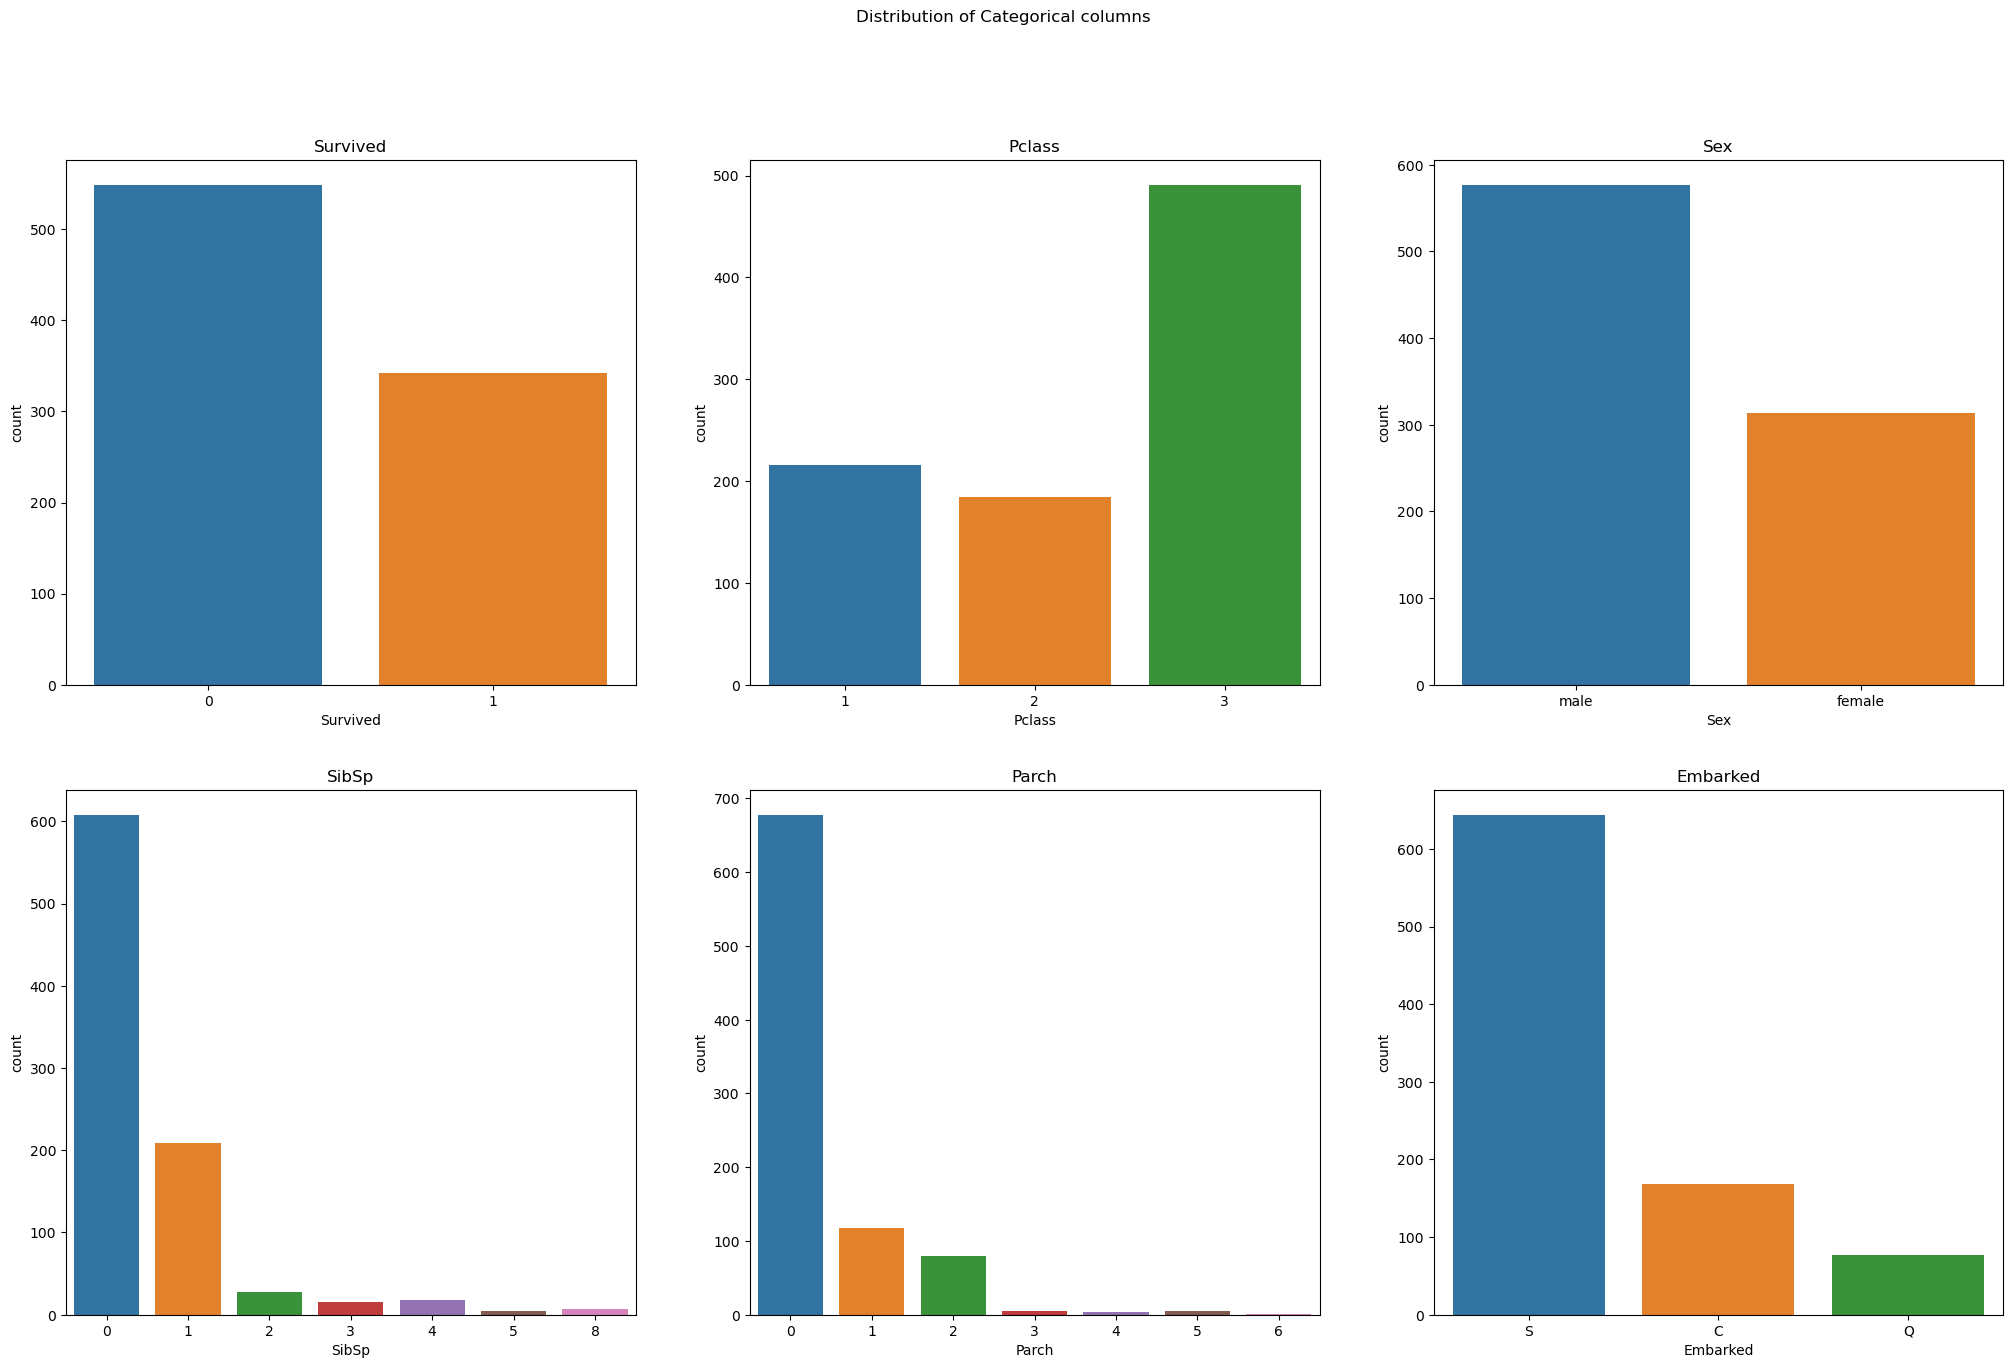

In [118]:
fig, ax = plt.subplots(2, 3, figsize = (25, 15))
plt.suptitle('Distribution of Categorical columns')

plt.subplot(231)
plt.title('Survived')
sns.countplot(data = mydf, x = 'Survived')

plt.subplot(232)
plt.title('Pclass')
sns.countplot(data = mydf, x = 'Pclass')

plt.subplot(233)
plt.title('Sex')
sns.countplot(data = mydf, x = 'Sex')

plt.subplot(234)
plt.title('SibSp')
sns.countplot(data = mydf, x = 'SibSp')

plt.subplot(235)
plt.title('Parch')
sns.countplot(data = mydf, x = 'Parch')

plt.subplot(236)
plt.title('Embarked')
sns.countplot(data = mydf, x = 'Embarked')


plt.show()

## BIVARIATE ANALYSIS

In [119]:
mydf.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [121]:
mydf.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


AttributeError: 'int' object has no attribute 'startswith'

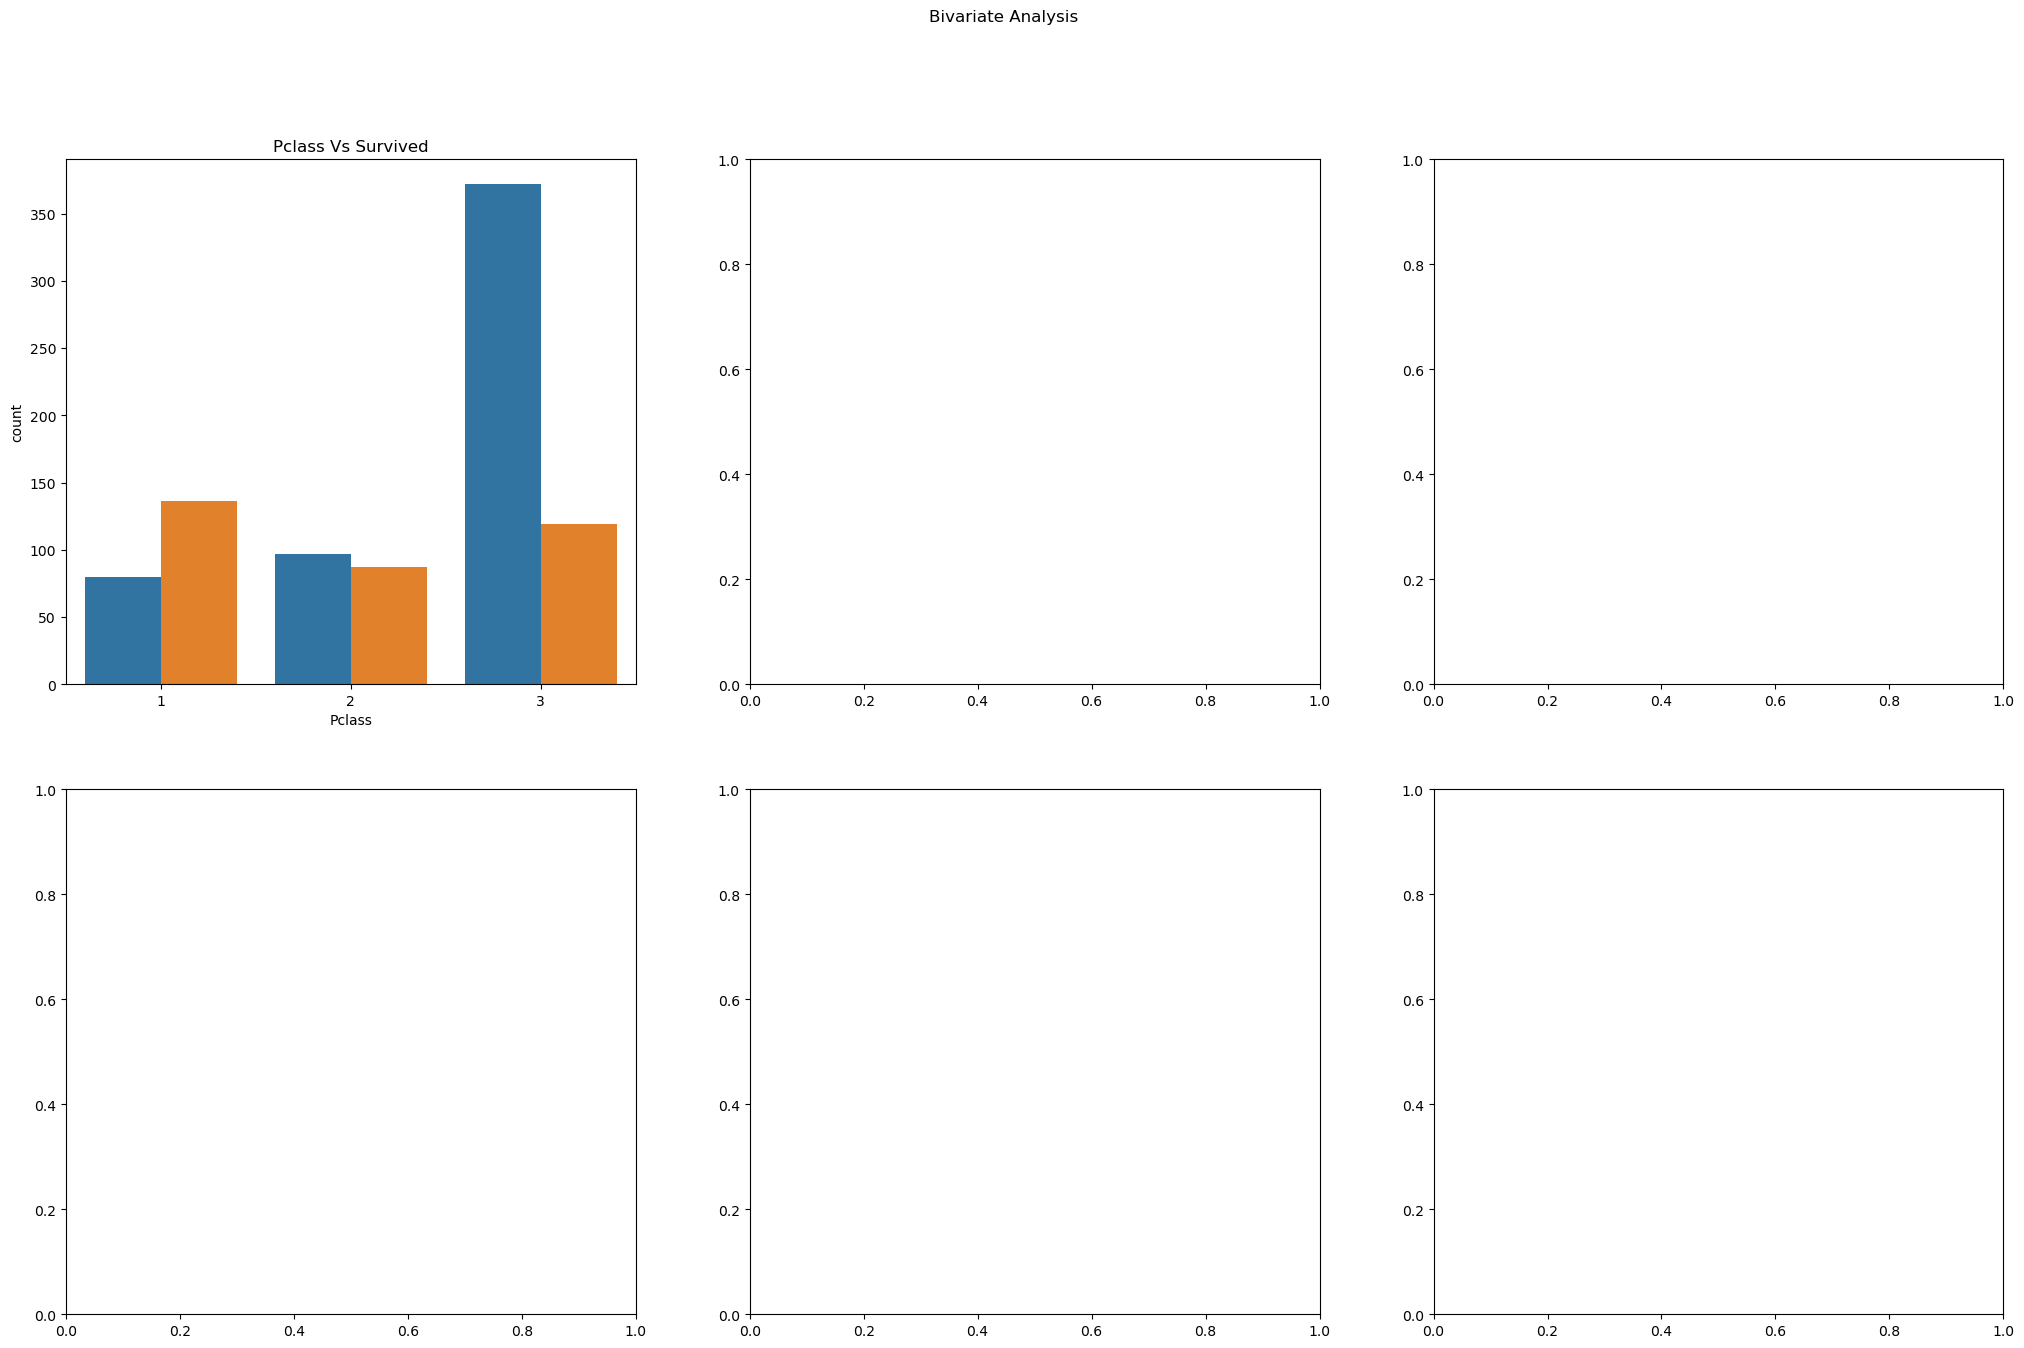

In [145]:
fig, ax = plt.subplots(2, 3, figsize = (25, 15))
plt.suptitle('Bivariate Analysis')

plt.subplot(231)
plt.title('Pclass Vs Survived')
sns.countplot(data = mydf, x = 'Pclass', hue = 'Survived')
# for container in ax[0].containers:
#     ax[0].bar_label(container, color = 'black', size = 10)

plt.show()

In [144]:
mydf.dtypes

Survived     object
Pclass       object
Sex          object
Age         float64
SibSp        object
Parch        object
Fare        float64
Embarked     object
dtype: object

<Axes: xlabel='count'>

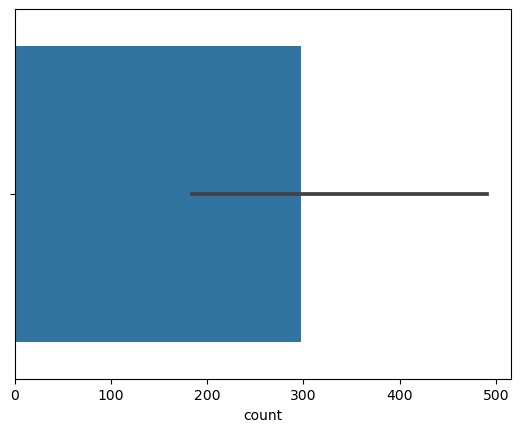

In [186]:
sns.barplot(data = mydf , x = mydf.Pclass.value_counts())

AttributeError: 'int' object has no attribute 'startswith'

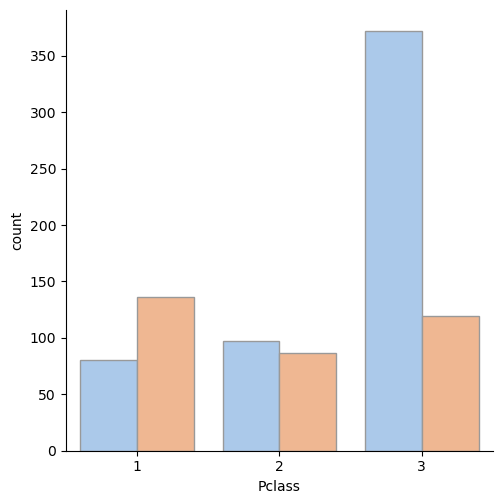

In [184]:
sns.catplot(
    data=mydf, x="Pclass", hue="Survived", kind="count",
    palette="pastel", edgecolor=".6",legend = 'full'
)